# Problem statement (Term Deposit Sale)
## Goal
Using the collected from existing customers, build a model that will help the marketing team identify potential customers who are relatively more likely to subscribe term deposit and thus increase their hit ratio.

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Import and Read Dataset

In [2]:
df = pd.read_csv('bank-full.csv')
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome Target  
0  unknown    5   may       261         1     -1         0  unknown     no  
1  unknown    5   may       151         1     -1         0  unknown     no  
2  unknown    5   may        76         1     -1         0  unknown     no  
3  unknown    5   may        92         1     -1         0  unknown     no  
4  unknown    5   may       198         1     -1         0  unknown     no

### Deliverable – 1 (Exploratory data quality report reflecting the following)
#### 1. Univariate analysis

a. Univariate analysis – data types and description of the independent attributes which should include (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers.

Attribute information
Input variables: # bank client data: 

1 - age (numeric) 

2 - job : type of job (categorical: 'admin.','blue collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown') 

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed) 

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown') 

5 - default: has credit in default? (categorical: 'no','yes','unknown') 

6 - housing: has housing loan? (categorical: 'no','yes','unknown') 

7 - loan: has personal loan? (categorical: 'no','yes','unknown') # related with the last contact of the current campaign: 

8 - contact: contact communication type (categorical: 'cellular','telephone') 

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec') 

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri') 

11 - duration: last contact duration, in seconds (numeric). 
		Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. 
		Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the 
		intention is to have a realistic predictive model. 

**other attributes:**

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact) 

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted) 

14 - previous: number of contacts performed before this campaign and for this client (numeric) 

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success') 

**Target** 

16 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [3]:
df.describe().T

count         mean          std     min    25%    50%     75%  \
age       45211.0    40.936210    10.618762    18.0   33.0   39.0    48.0   
balance   45211.0  1362.272058  3044.765829 -8019.0   72.0  448.0  1428.0   
day       45211.0    15.806419     8.322476     1.0    8.0   16.0    21.0   
duration  45211.0   258.163080   257.527812     0.0  103.0  180.0   319.0   
campaign  45211.0     2.763841     3.098021     1.0    1.0    2.0     3.0   
pdays     45211.0    40.197828   100.128746    -1.0   -1.0   -1.0    -1.0   
previous  45211.0     0.580323     2.303441     0.0    0.0    0.0     0.0   

               max  
age           95.0  
balance   102127.0  
day           31.0  
duration    4918.0  
campaign      63.0  
pdays        871.0  
previous     275.0

**Observations:**
    
    from this all data seems to have outliers

**As there are many categorical variable, let's use below to get overview of all features**

In [4]:
df.describe(include='all').T

count unique          top   freq      mean      std   min  25%  \
age        45211    NaN          NaN    NaN   40.9362  10.6188    18   33   
job        45211     12  blue-collar   9732       NaN      NaN   NaN  NaN   
marital    45211      3      married  27214       NaN      NaN   NaN  NaN   
education  45211      4    secondary  23202       NaN      NaN   NaN  NaN   
default    45211      2           no  44396       NaN      NaN   NaN  NaN   
balance    45211    NaN          NaN    NaN   1362.27  3044.77 -8019   72   
housing    45211      2          yes  25130       NaN      NaN   NaN  NaN   
loan       45211      2           no  37967       NaN      NaN   NaN  NaN   
contact    45211      3     cellular  29285       NaN      NaN   NaN  NaN   
day        45211    NaN          NaN    NaN   15.8064  8.32248     1    8   
month      45211     12          may  13766       NaN      NaN   NaN  NaN   
duration   45211    NaN          NaN    NaN   258.163  257.528     0  103   
campaign   45211    NaN          NaN    NaN   2.76384  3.09802     1    1   
pdays      45211    NaN          NaN    NaN   40.1978  100.129    -1   -1   
previous   45211    NaN          NaN    NaN  0.580323  2.30344     0    0   
poutcome   45211      4      unknown  36959       NaN      NaN   NaN  NaN   
Target     45211      2           no  39922       NaN      NaN   NaN  NaN   

           50%   75%     max  
age         39    48      95  
job        NaN   NaN     NaN  
marital    NaN   NaN     NaN  
education  NaN   NaN     NaN  
default    NaN   NaN     NaN  
balance    448  1428  102127  
housing    NaN   NaN     NaN  
loan       NaN   NaN     NaN  
contact    NaN   NaN     NaN  
day         16    21      31  
month      NaN   NaN     NaN  
duration   180   319    4918  
campaign     2     3      63  
pdays       -1    -1     871  
previous     0     0     275  
poutcome   NaN   NaN     NaN  
Target     NaN   NaN     NaN

**Observations:**

1. Age, mean is approx 41 and standard deviation is 10.62
2. Balance, mean is approx 1362.27 and standard deviation is 3044.76
3. day, mean is approx 15.8 and standard deviation is 8.32
4. duration, mean is approx 258.16 and standard deviation is 257.52
5. campaign, mean is approx 2.76 and standard deviation is 3.09
6. pdays, mean is approx 40.20 and standard deviation is 100.12
7. previous, mean is approx 0.58 and standard deviation is 2.30

Let's plot the data and visualise their distribution

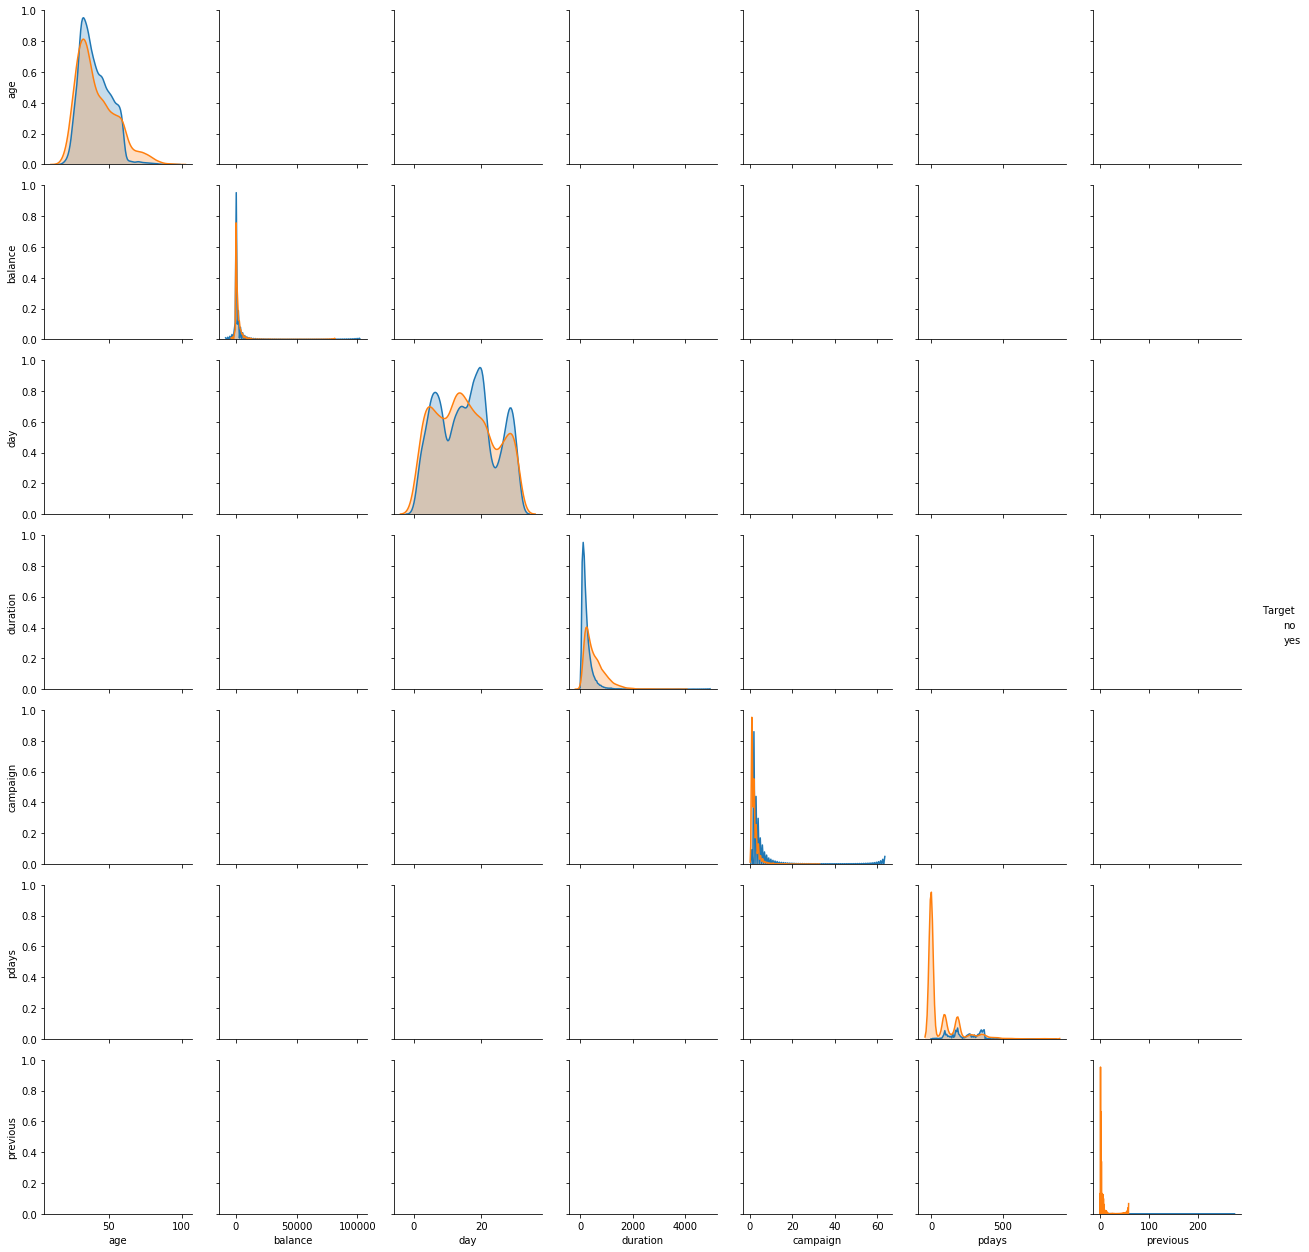

In [5]:
sns.pairplot(data=df, hue='Target', kind='kde')

**Observations**

from the above plot, we could see Age is somewhat normally distributed.
But disribution is not the going to be assumed for our model building, as we are going to use Ensemble Method.

By looking at Duration feature, we could see more the last contact duration, customers are not subscribing the term deposit. But as per the information mentioned in the problem description, this feature can be discarded, because when we are predicting the Term deposit subscription success for new user, then this feature will have no value and can cause model to not generalize well.

By looking at pdays feature, we could see more the number of days passed to contact customer, customers are not subscribing the term deposit.

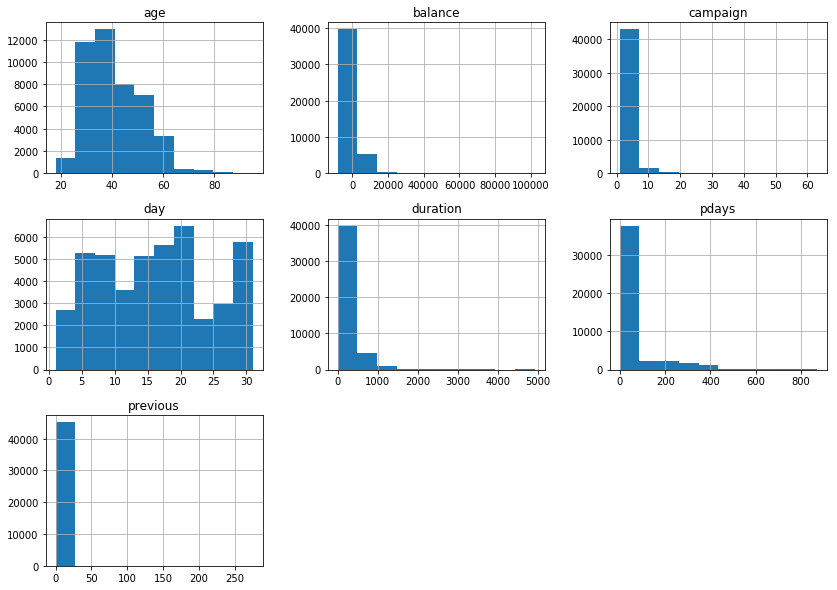

In [6]:
df.hist(bins=10, figsize=(14,10))
plt.show()

In [7]:
df.shape

(45211, 17)

**We have 45211 records and 17 features(1-dependent and 16-independent)**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


**from the above we could see that there is no missing values in our dataset**

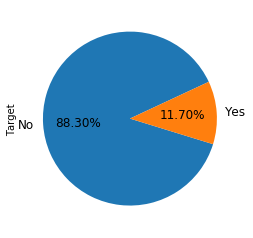

In [9]:
df["Target"].value_counts().plot.pie(autopct='%1.2f%%',labels=['No','Yes'], fontsize=12, startangle=25)

**Data is highly unbalanced**

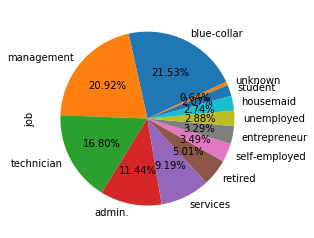

In [10]:
df["job"].value_counts().plot.pie(autopct='%1.2f%%', fontsize=10, startangle=25)

**Observations:**

Blue Collar, Management, technician are having majority in the dataset

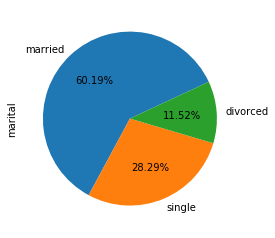

In [11]:
df["marital"].value_counts().plot.pie(autopct='%1.2f%%', fontsize=10, startangle=25)

**Observations:**

Married customers are having majority in the dataset

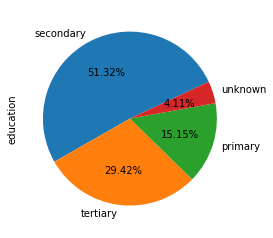

In [12]:
df["education"].value_counts().plot.pie(autopct='%1.2f%%', fontsize=10, startangle=25)

**Observations:**

Secondary level education contributes to more than 51% of data in the dataset

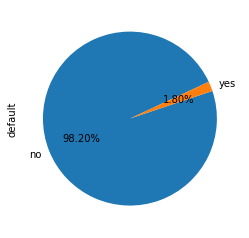

In [13]:
df["default"].value_counts().plot.pie(autopct='%1.2f%%', fontsize=10, startangle=25)

**Observations:**

Most of the customers are non defaulters in the dataset

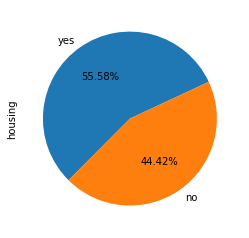

In [14]:
df["housing"].value_counts().plot.pie(autopct='%1.2f%%', fontsize=10, startangle=25)

**Observations:**

Housing loan is kind of evenly distributed in the dataset

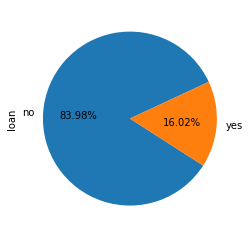

In [15]:
df["loan"].value_counts().plot.pie(autopct='%1.2f%%', fontsize=10, startangle=25)

**Observations:**

Most of the people has not taken loans

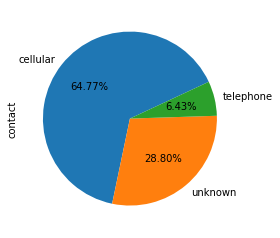

In [16]:
df["contact"].value_counts().plot.pie(autopct='%1.2f%%', fontsize=10, startangle=25)

**Observations:**

Most of the customers mobile phone number is in contact info

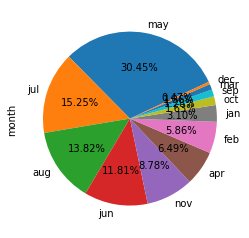

In [17]:
df["month"].value_counts().plot.pie(autopct='%1.2f%%', fontsize=10, startangle=25)

most of the customers were contacted on the month of May

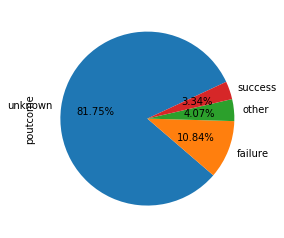

In [18]:
df["poutcome"].value_counts().plot.pie(autopct='%1.2f%%', fontsize=10, startangle=25)

**Observations:**

MOst of the previous campaign outcomes are unknown

{'whiskers': [<matplotlib.lines.Line2D at 0x24ee2165400>,
 'caps': [<matplotlib.lines.Line2D at 0x24ee2165a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x24ee21652b0>],
 'medians': [<matplotlib.lines.Line2D at 0x24ee2430160>],
 'fliers': [<matplotlib.lines.Line2D at 0x24ee24304a8>],
 'means': []}

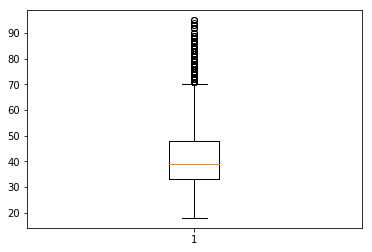

In [19]:
plt.boxplot(df.age)

**Observations:**

Age is having lots of outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x24ee2482780>,
 'caps': [<matplotlib.lines.Line2D at 0x24ee2482e48>,
 'boxes': [<matplotlib.lines.Line2D at 0x24ee2482630>],
 'medians': [<matplotlib.lines.Line2D at 0x24ee2490518>],
 'fliers': [<matplotlib.lines.Line2D at 0x24ee2490860>],
 'means': []}

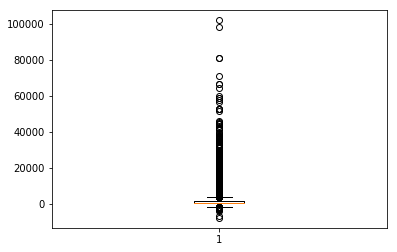

In [20]:
plt.boxplot(df.balance)

**Observations:**

Balance is having lots of outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x24ee24e2278>,
 'caps': [<matplotlib.lines.Line2D at 0x24ee24e2908>,
 'boxes': [<matplotlib.lines.Line2D at 0x24ee24e2128>],
 'medians': [<matplotlib.lines.Line2D at 0x24ee24e2f98>],
 'fliers': [<matplotlib.lines.Line2D at 0x24ee24ec320>],
 'means': []}

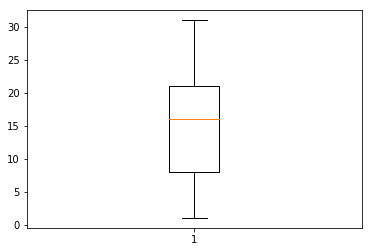

In [21]:
plt.boxplot(df.day)

**Observations:**

day is not having  outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x24ee2541208>,
 'caps': [<matplotlib.lines.Line2D at 0x24ee2541898>,
 'boxes': [<matplotlib.lines.Line2D at 0x24ee25410b8>],
 'medians': [<matplotlib.lines.Line2D at 0x24ee2541f28>],
 'fliers': [<matplotlib.lines.Line2D at 0x24ee25492b0>],
 'means': []}

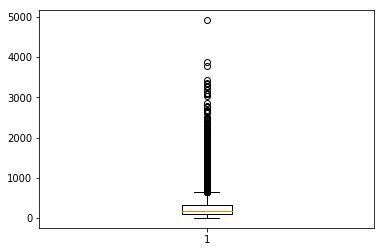

In [22]:
plt.boxplot(df.duration)

**Observations:**

duration is having lots of outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x24ee2592d68>,
 'caps': [<matplotlib.lines.Line2D at 0x24ee259d438>,
 'boxes': [<matplotlib.lines.Line2D at 0x24ee2592c18>],
 'medians': [<matplotlib.lines.Line2D at 0x24ee259dac8>],
 'fliers': [<matplotlib.lines.Line2D at 0x24ee259de10>],
 'means': []}

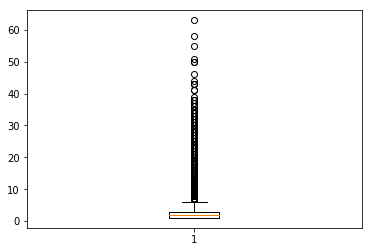

In [23]:
plt.boxplot(df.campaign)

**Observations:**

Campaign is having lots of outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x24ee1c8d2b0>,
 'caps': [<matplotlib.lines.Line2D at 0x24ee1e3c8d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x24ee1c8d518>],
 'medians': [<matplotlib.lines.Line2D at 0x24ee1e3c048>],
 'fliers': [<matplotlib.lines.Line2D at 0x24ee1e3c6a0>],
 'means': []}

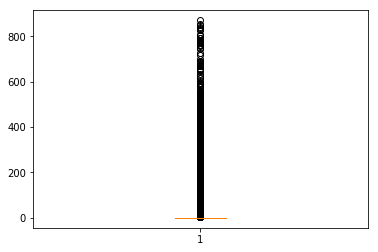

In [24]:
plt.boxplot(df.pdays)

**Observations:**

pdays having lots of outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x24ee21ac828>,
 'caps': [<matplotlib.lines.Line2D at 0x24ee21acc50>,
 'boxes': [<matplotlib.lines.Line2D at 0x24ee21ac780>],
 'medians': [<matplotlib.lines.Line2D at 0x24ee1e55400>],
 'fliers': [<matplotlib.lines.Line2D at 0x24ee1e55b70>],
 'means': []}

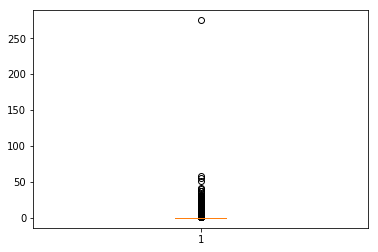

In [25]:
plt.boxplot(df.previous)

**Observations:**

Previous is having lots of outliers

#### 2. Multivariate analysis

a. Bi-variate analysis between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Presence of leverage points. Visualize the analysis using boxplots and pair plots, histograms or density curves. Select the most appropriate attributes.

Correlation:

To determine correlation with target feature, we need to convert out categorical features to numeric

In [26]:
df_encoded = df.copy()

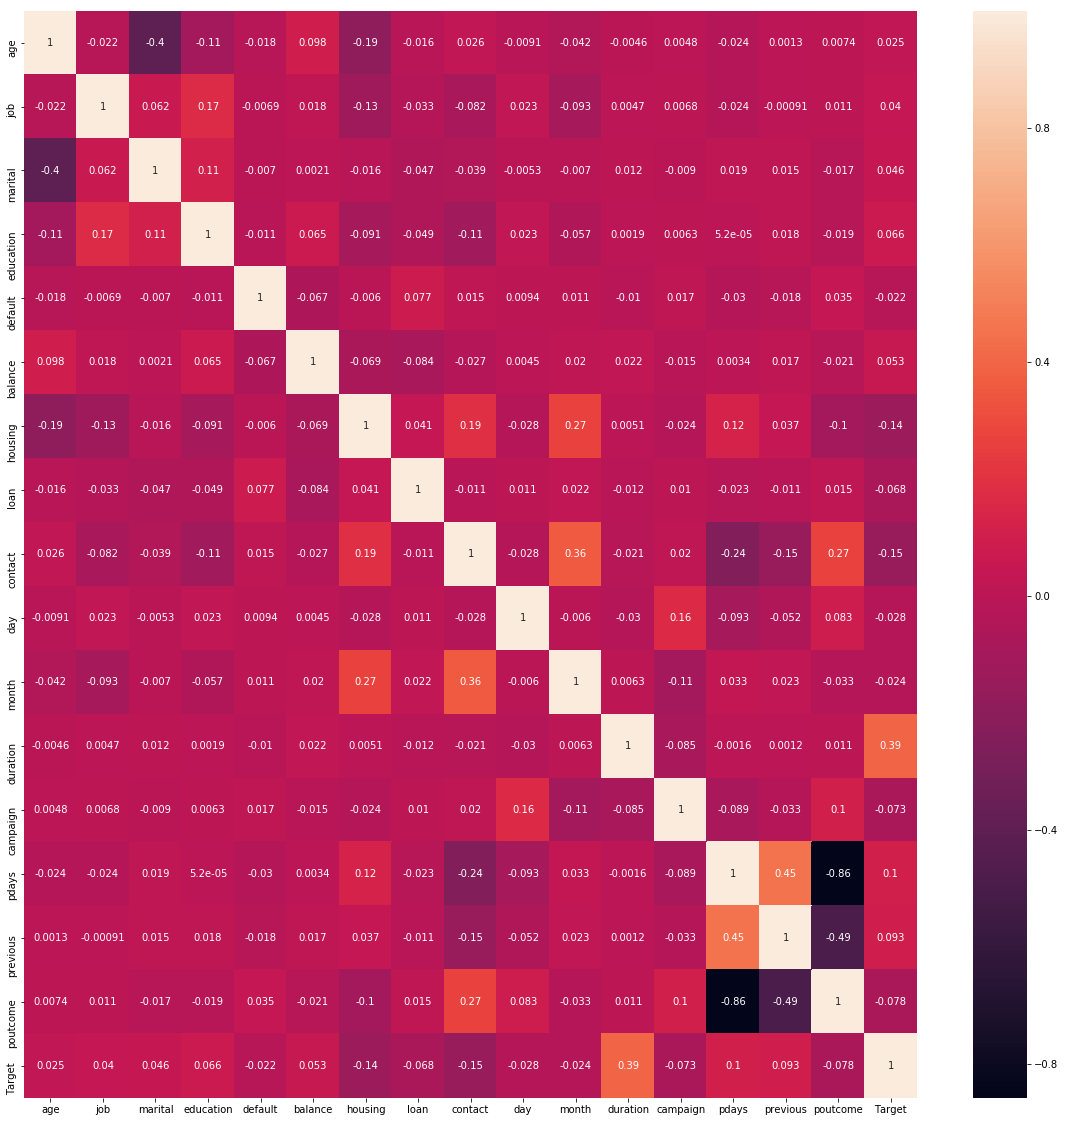

In [27]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
    fig = plt.figure(figsize=(20,20))
df_encoded['Target'] = LabelEncoder().fit_transform(df_encoded['Target'])
df_encoded['job'] = LabelEncoder().fit_transform(df_encoded['job'])
df_encoded['marital'] = LabelEncoder().fit_transform(df_encoded['marital'])
df_encoded['education'] = LabelEncoder().fit_transform(df_encoded['education'])
df_encoded['default'] = LabelEncoder().fit_transform(df_encoded['default'])
df_encoded['housing'] = LabelEncoder().fit_transform(df_encoded['housing'])
df_encoded['loan'] = LabelEncoder().fit_transform(df_encoded['loan'])
df_encoded['contact'] = LabelEncoder().fit_transform(df_encoded['contact'])
df_encoded['month'] = LabelEncoder().fit_transform(df_encoded['month'])
df_encoded['poutcome'] = LabelEncoder().fit_transform(df_encoded['poutcome'])
sns.heatmap(df_encoded.corr(), cbar=True, annot=True)

looks like pdays and previous is very little correlated with each other.

Duration is slightly correlated with target

In [28]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

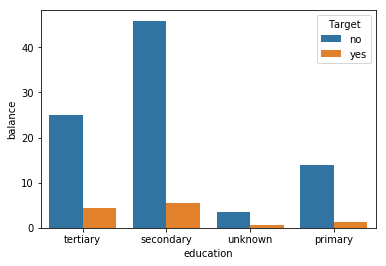

In [29]:
sns.barplot(x="education", y="balance", hue="Target", data=df, estimator=lambda x: len(x) / len(df) * 100)

**Observation:**

People having Higher education is having high balance and are subsribing to Term deposit as well

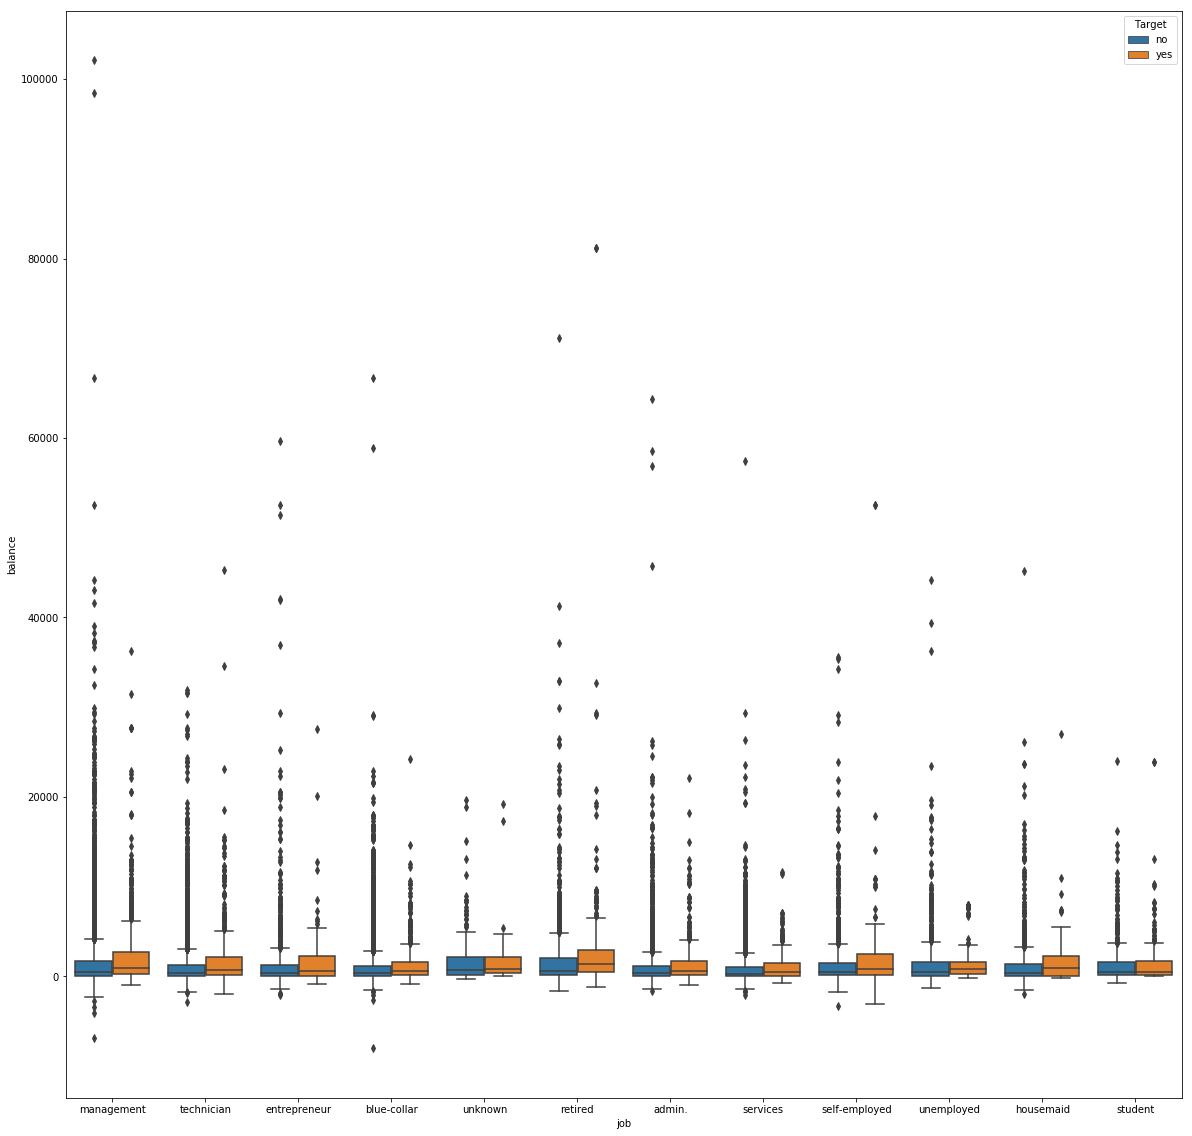

In [30]:
fig = plt.figure(figsize=(20,20))
sns.boxplot(x="job", y="balance", hue="Target",data=df)

**Observation**

    balance feature is having outliers in each Job type of customers.
    
    It makes sense as each person is having different type of saving methods.
    
    Management is the occupation that is more spreaded in this dataset.
    
    The retired are the ones who have the highest median age while student are the lowest, which is what we also expect.
    
    Management and Retirees are having the highest balance in their accounts.

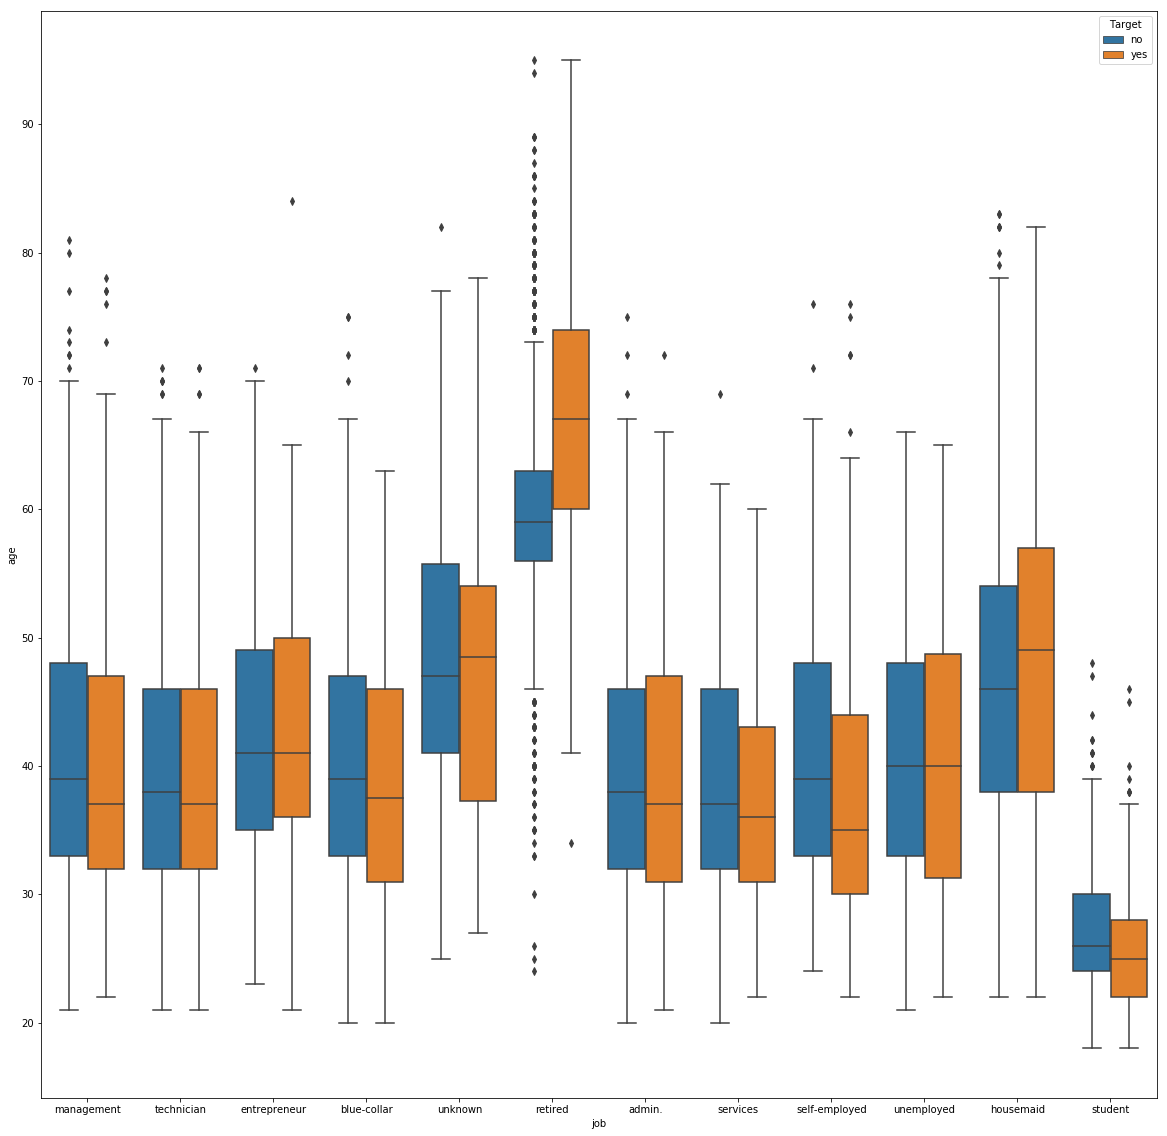

In [31]:
fig = plt.figure(figsize=(20,20))
sns.boxplot(x="job", y="age", hue="Target",data=df)

**Observation:**

the observation is expected, 
Retired are the ones with more age and student are the ones with less age.
There is outlier in each Ages, which is also expected.

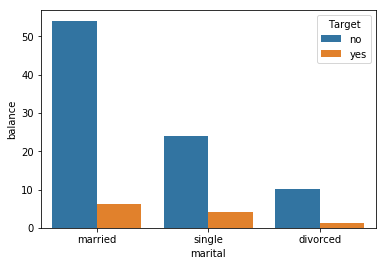

In [32]:
sns.barplot(x="marital", y="balance", hue="Target", data=df, estimator=lambda x: len(x) / len(df) * 100)

**Observation:**

the observation is expected, 
Divorced are the ones having less balance as they has to share the financial asset.

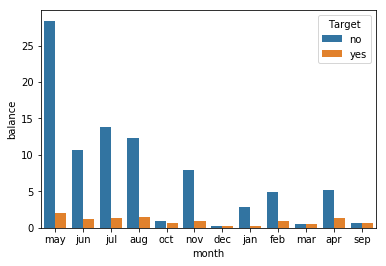

In [33]:
sns.barplot(x="month", y="balance", hue="Target", data=df, estimator=lambda x: len(x) / len(df) * 100)

**Observation:**

Looks like in the month of may, jun, jul and aug most customers subsribed to term deposit

In [34]:
column_list = [df]
for column in column_list:
    column.loc[column["age"] < 30,  "age_group"] = 20
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), "age_group"] = 30
    column.loc[(column["age"] >= 40) & (column["age"] <= 49), "age_group"] = 40
    column.loc[(column["age"] >= 50) & (column["age"] <= 59), "age_group"] = 50
    column.loc[column["age"] >= 60, "age_group"] = 60
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome Target  \
0  unknown    5   may       261         1     -1         0  unknown     no   
1  unknown    5   may       151         1     -1         0  unknown     no   
2  unknown    5   may        76         1     -1         0  unknown     no   
3  unknown    5   may        92         1     -1         0  unknown     no   
4  unknown    5   may       198         1     -1         0  unknown     no   

   age_group  
0       50.0  
1       40.0  
2       30.0  
3       40.0  
4       30.0

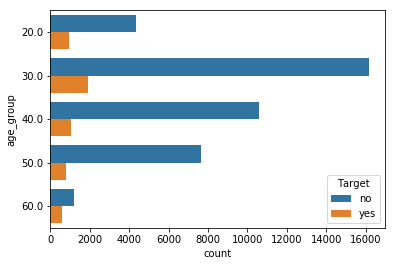

In [35]:
sns.countplot(y="age_group", hue='Target', data=df)

In [36]:
df['balance_group'] = np.nan

column_list = [df]

for column in column_list:
    column.loc[column['balance'] <= 0, 'balance_group'] = 'no balance'
    column.loc[(column['balance'] > 0) & (column['balance'] <= 1000), 'balance_group'] = 'low balance'
    column.loc[(column['balance'] > 1000) & (column['balance'] <= 5000), 'balance_group'] = 'average balance'
    column.loc[column['balance'] > 5000, 'balance_group'] = 'high balance'
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome Target  \
0  unknown    5   may       261         1     -1         0  unknown     no   
1  unknown    5   may       151         1     -1         0  unknown     no   
2  unknown    5   may        76         1     -1         0  unknown     no   
3  unknown    5   may        92         1     -1         0  unknown     no   
4  unknown    5   may       198         1     -1         0  unknown     no   

   age_group    balance_group  
0       50.0  average balance  
1       40.0      low balance  
2       30.0      low balance  
3       40.0  average balance  
4       30.0      low balance

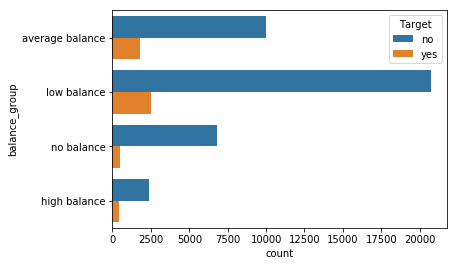

In [37]:
sns.countplot(y="balance_group", hue='Target', data=df)

C:\Users\punit\Anaconda3\envs\aiml\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\punit\Anaconda3\envs\aiml\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


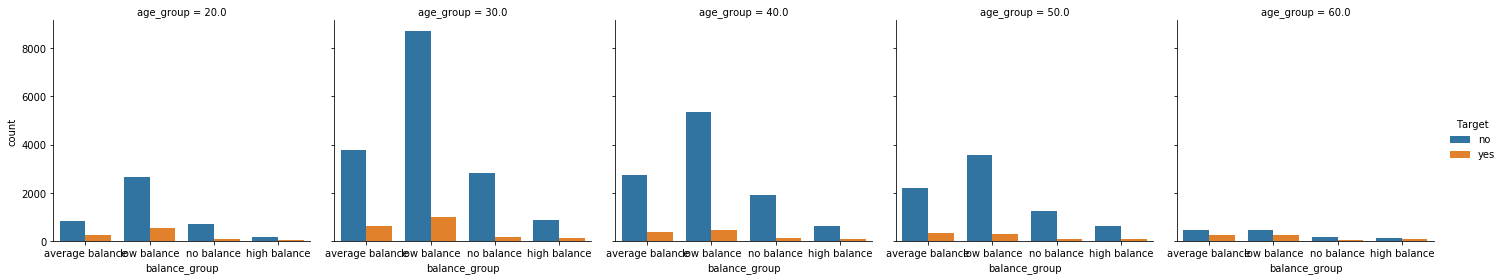

In [38]:
sns.factorplot(x="balance_group",hue="Target", col="age_group",data=df, kind="count",size=4)

**Observations:**

People working in Management, Blue-Collars and Technicians received the most offers from the marketing department to suscribe term deposits.

Students, entrepreneurs and housemaids received the less amount of offers from the marketing department.

most of the students suscribed term deposits (Which was expected since the youngest segment of the population is most likely to be a student)

Most of people who were retired were willing to suscribe term deposits (This was also expected since the oldest segment of the population is most likely to be retirees).

Most of the unemployed were willing to suscribe term deposits.

Age group 20s and 30s with low and average balance are subsribing to term deposit

#### 3. Strategies to address the different data challenges such as data pollution, outliers and missing values.

As per our analysis earlier, we could see there is no missing values but there is lots of outliers in all features

In [39]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null int32
marital      45211 non-null int32
education    45211 non-null int32
default      45211 non-null int32
balance      45211 non-null int64
housing      45211 non-null int32
loan         45211 non-null int32
contact      45211 non-null int32
day          45211 non-null int64
month        45211 non-null int32
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null int32
Target       45211 non-null int32
dtypes: int32(10), int64(7)
memory usage: 4.1 MB


Deliverable – 2 (Prepare the data for analytics)
1. Load the data into a data-frame. The data-frame should have data and column description.
2. Ensure the attribute types are correct. If not, take appropriate actions.
3. Transform the data i.e. scale / normalize if required
4. Create the training set and test set in ration of 70:30

As data is highly imbalanced, term deposit is going to be highly influenced in the test and new data and will tend to overfit the model. 

So, we will use **Stratified Sampling** method to overcome the imbalance issue

To remove Outliers, we will use **Standard Scaling** method by removing the mean and scaling to unit variance

The standard score of a sample x is calculated as:

z = (x - u) / s
where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or one if with_std=False.

In [40]:
df_encoded.head()

age  job  marital  education  default  balance  housing  loan  contact  \
0   58    4        1          2        0     2143        1     0        2   
1   44    9        2          1        0       29        1     0        2   
2   33    2        1          1        0        2        1     1        2   
3   47    1        1          3        0     1506        1     0        2   
4   33   11        2          3        0        1        0     0        2   

   day  month  duration  campaign  pdays  previous  poutcome  Target  
0    5      8       261         1     -1         0         3       0  
1    5      8       151         1     -1         0         3       0  
2    5      8        76         1     -1         0         3       0  
3    5      8        92         1     -1         0         3       0  
4    5      8       198         1     -1         0         3       0

In [41]:
from sklearn.model_selection import StratifiedShuffleSplit
stratified = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

for train_set, test_set in stratified.split(df_encoded, df_encoded["Target"]):
    stratified_train = df_encoded.loc[train_set]
    stratified_test = df_encoded.loc[test_set]

In [42]:
stratified_train['Target'].value_counts()

0    27945
1     3702
Name: Target, dtype: int64

In [43]:
stratified_test['Target'].value_counts()

0    11977
1     1587
Name: Target, dtype: int64

In [44]:
stratified_train.head()

age  job  marital  education  default  balance  housing  loan  contact  \
13382   31    7        1          1        0        1        1     0        0   
32641   35    7        1          1        0      195        1     0        0   
3991    24    1        2          1        0       77        1     0        2   
8068    35    1        1          1        0       80        1     1        2   
27484   37    7        2          1        0      105        0     1        0   

       day  month  duration  campaign  pdays  previous  poutcome  Target  
13382    9      5        82         1     -1         0         3       0  
32641   17      0       203         1     -1         0         3       0  
3991    16      8       236         2     -1         0         3       0  
8068     2      6       579         2     -1         0         3       0  
27484   21      9       197         2    157         4         0       0

In [45]:
scaler = StandardScaler()
stratified_train[["age", "balance", "day", "campaign", "pdays", "previous","duration"]] = scaler.fit_transform(stratified_train[["age", "balance", "day", "campaign", "pdays", "previous","duration"]])
stratified_test[["age", "balance", "day", "campaign", "pdays", "previous","duration"]] = scaler.fit_transform(stratified_test[["age", "balance", "day", "campaign", "pdays", "previous","duration"]])

C:\Users\punit\Anaconda3\envs\aiml\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\punit\Anaconda3\envs\aiml\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\punit\Anaconda3\envs\aiml\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\punit\Anaconda3\envs\aiml\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [46]:
stratified_train.head()

age  job  marital  education  default   balance  housing  loan  \
13382 -0.930461    7        1          1        0 -0.443813        1     0   
32641 -0.553871    7        1          1        0 -0.380625        1     0   
3991  -1.589493    1        2          1        0 -0.419059        1     0   
8068  -0.553871    1        1          1        0 -0.418082        1     1   
27484 -0.365576    7        2          1        0 -0.409939        0     1   

       contact       day  month  duration  campaign     pdays  previous  \
13382        0 -0.817039      5 -0.680152 -0.566850 -0.410038 -0.234774   
32641        0  0.143236      0 -0.214545 -0.566850 -0.410038 -0.234774   
3991         2  0.023201      8 -0.087562 -0.244783 -0.410038 -0.234774   
8068         2 -1.657280      6  1.232298 -0.244783 -0.410038 -0.234774   
27484        0  0.623373      9 -0.237633 -0.244783  1.175153  1.371081   

       poutcome  Target  
13382         3       0  
32641         3       0  
3991          3       0  
8068          3       0  
27484         0       0

In [47]:
X_train = stratified_train.drop('Target', axis=1)
y_train = stratified_train['Target']
X_test = stratified_test.drop('Target', axis=1)
y_test = stratified_test['Target']

# Building Models

In [48]:
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier,RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

**1. Decision Tree**

In [49]:
dt_model = DecisionTreeClassifier(criterion = 'entropy' )
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [50]:
dt_model.score(X_train, y_train)

1.0

In [51]:
dt_model.score(X_test, y_test)

0.8765113535830139

In [52]:
dt_model_pred = dt_model.predict(X_test)

**Confusion Matrix:**


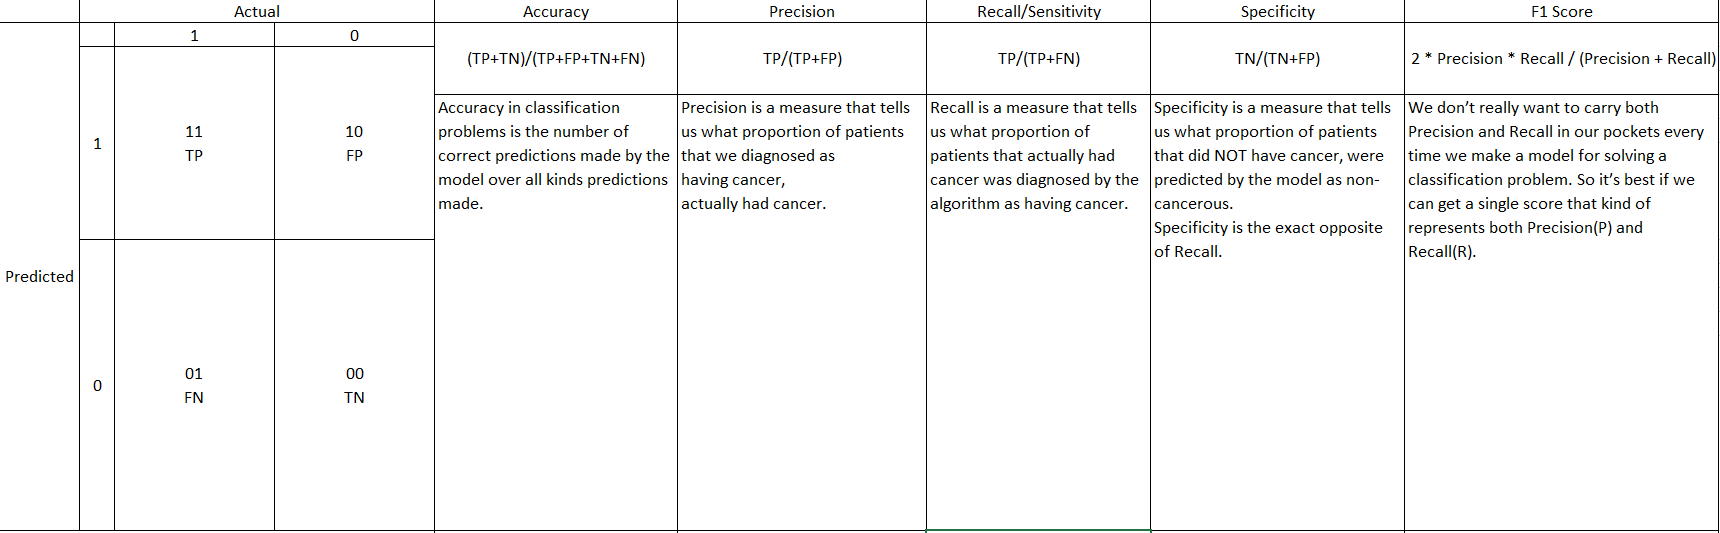


In [53]:
def model_evaluation(model,criterion,max_depth = None,min_samples_leaf=1):
    my_model = model(criterion=criterion,max_depth=max_depth,min_samples_leaf=min_samples_leaf,random_state=101)
    my_model.fit(X_train, y_train)
    y_pred = my_model.predict(X_test)
    train_score = my_model.score(X_train, y_train)
    test_score = my_model.score(X_test, y_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)
    return model, criterion, max_depth, min_samples_leaf, train_score, test_score, precision, recall, f1, confusion_mat

In [54]:
model_evaluation(DecisionTreeClassifier, criterion='gini', max_depth=15, min_samples_leaf=15)

(sklearn.tree.tree.DecisionTreeClassifier,
 'gini',
 15,
 15,
 0.9253325749676115,
 0.8947950457092303,
 0.5658978583196046,
 0.43289224952741023,
 0.4905390931810068,
 array([[11450,   527],
        [  900,   687]], dtype=int64))

In [55]:
d_tree=[]
for depth in np.arange(1,50,2):
    model, criterion, max_depth, min_samples_leaf, train_score, test_score, precision, recall, f1, confusion_mat = model_evaluation(DecisionTreeClassifier, criterion='entropy', max_depth=depth, min_samples_leaf=15)
    d_tree_mod = {'model':model, 'max_depth': max_depth, 'train_score':train_score, 'test_score': test_score, 'precision':precision, 'recall':recall, 'f1':f1 }
    d_tree.append(d_tree_mod)
dtree_data = pd.DataFrame(d_tree)

C:\Users\punit\Anaconda3\envs\aiml\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\punit\Anaconda3\envs\aiml\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [56]:
dtree_data.head()

f1  max_depth                                              model  \
0  0.000000          1  <class 'sklearn.tree.tree.DecisionTreeClassifi...   
1  0.266473          3  <class 'sklearn.tree.tree.DecisionTreeClassifi...   
2  0.346374          5  <class 'sklearn.tree.tree.DecisionTreeClassifi...   
3  0.497611          7  <class 'sklearn.tree.tree.DecisionTreeClassifi...   
4  0.536875          9  <class 'sklearn.tree.tree.DecisionTreeClassifi...   

   precision    recall  test_score  train_score  
0   0.000000  0.000000    0.882999     0.883022  
1   0.576520  0.173283    0.888381     0.889784  
2   0.572674  0.248267    0.890372     0.894145  
3   0.597002  0.426591    0.899219     0.906405  
4   0.602826  0.483932    0.902315     0.913610

In [57]:
dtree_data.iloc[dtree_data['train_score'].idxmax()]

f1                                                      0.510579
max_depth                                                     19
model          <class 'sklearn.tree.tree.DecisionTreeClassifi...
precision                                               0.567901
recall                                                  0.463768
test_score                                              0.895975
train_score                                             0.925175
Name: 9, dtype: object

In [58]:
dtree_data.iloc[dtree_data['test_score'].idxmax()]

f1                                                      0.536875
max_depth                                                      9
model          <class 'sklearn.tree.tree.DecisionTreeClassifi...
precision                                               0.602826
recall                                                  0.483932
test_score                                              0.902315
train_score                                              0.91361
Name: 4, dtype: object

In [59]:
dtree_data.iloc[dtree_data['precision'].idxmax()]

f1                                                      0.536875
max_depth                                                      9
model          <class 'sklearn.tree.tree.DecisionTreeClassifi...
precision                                               0.602826
recall                                                  0.483932
test_score                                              0.902315
train_score                                              0.91361
Name: 4, dtype: object

In [60]:
dtree_data.iloc[dtree_data['recall'].idxmax()]

f1                                                      0.536875
max_depth                                                      9
model          <class 'sklearn.tree.tree.DecisionTreeClassifi...
precision                                               0.602826
recall                                                  0.483932
test_score                                              0.902315
train_score                                              0.91361
Name: 4, dtype: object

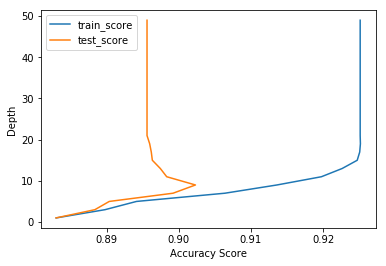

In [61]:
plt.plot(dtree_data['train_score'],dtree_data['max_depth'])
plt.plot(dtree_data['test_score'],dtree_data['max_depth'])
plt.xlabel('Accuracy Score')
plt.ylabel('Depth')
plt.legend(['train_score', 'test_score'], loc='upper left')

In [62]:
confusion_mat_dtree = confusion_matrix(y_test, dt_model_pred)
confusion_mat_dtree

array([[11129,   848],
       [  827,   760]], dtype=int64)

From the above plot, we could infer that by increasing the depth, accuracy also increasing.

the accuracy steadily increasing till max depth 5 or 6, then it decreases and then went to constant low accuracy.

which explains, increasing the depth increases model complexity and thus leads to high variance and Overfitting model.

Based on High Precision, recall and accuracy as well max depth seems to be 9. So, I would chose depth value of 9 for best classifying the term deposit subscriptions.

**2. Bagging**

In [63]:
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier(n_estimators=100, max_samples=.50 , oob_score=True)

bgcl = bgcl.fit(X_train, y_train)
print(bgcl.oob_score_)

0.9040035390400354


In [64]:
bgcl.score(X_test,y_test)

0.9046004128575641

In [65]:
bgcl_pred = bgcl.predict(X_test)

In [66]:
train_score = bgcl.score(X_train, y_train)
test_score = bgcl.score(X_test, y_test)
precision = precision_score(y_test, bgcl_pred)
recall = recall_score(y_test, bgcl_pred)
f1 = f1_score(y_test, bgcl_pred)

In [67]:
train_score

0.981736025531646

In [68]:
test_score

0.9046004128575641

In [69]:
bag_conf_mat = confusion_matrix(y_test, bgcl_pred)
bag_conf_mat

array([[11561,   416],
       [  878,   709]], dtype=int64)

Bagging classifier increased the overall accuracy of the model

In [71]:
def bgcl_model_eval(model,n_estimators=100, max_samples=.50 , oob_score=False):
    my_model = model(n_estimators=n_estimators, max_samples=max_samples , oob_score=oob_score)
    my_model.fit(X_train, y_train)
    y_pred = my_model.predict(X_test)
    train_score = my_model.score(X_train, y_train)
    test_score = my_model.score(X_test, y_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)
    return model, n_estimators, max_samples , oob_score, train_score, test_score, precision, recall, f1, confusion_mat

In [72]:
bgcl=[]
for n in np.arange(10,300,50):
    model, n_estimators, max_samples , oob_score, train_score, test_score, precision, recall, f1, confusion_mat = bgcl_model_eval(BaggingClassifier,n_estimators=n, max_samples=.50 , oob_score=True)
    bgcl_mod = {'model':model, 'n_estimators': n_estimators,'oob_score':oob_score, 'train_score':train_score, 'test_score': test_score, 'precision':precision, 'recall':recall, 'f1':f1 }
    bgcl.append(bgcl_mod)
bgcl_data = pd.DataFrame(bgcl)

C:\Users\punit\Anaconda3\envs\aiml\lib\site-packages\sklearn\ensemble\bagging.py:610: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\punit\Anaconda3\envs\aiml\lib\site-packages\sklearn\ensemble\bagging.py:615: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


In [73]:
bgcl_data.iloc[bgcl_data['train_score'].idxmax()]

f1                                                        0.53304
model           <class 'sklearn.ensemble.bagging.BaggingClassi...
n_estimators                                                  260
oob_score                                                    True
precision                                                0.638522
recall                                                   0.457467
test_score                                               0.906222
train_score                                              0.982905
Name: 5, dtype: object

In [74]:
bgcl_data.iloc[bgcl_data['test_score'].idxmax()]

f1                                                       0.542522
model           <class 'sklearn.ensemble.bagging.BaggingClassi...
n_estimators                                                  210
oob_score                                                    True
precision                                                0.648554
recall                                                   0.466289
test_score                                               0.907992
train_score                                              0.982242
Name: 4, dtype: object

In [75]:
bgcl_data.iloc[bgcl_data['precision'].idxmax()]

f1                                                       0.542522
model           <class 'sklearn.ensemble.bagging.BaggingClassi...
n_estimators                                                  210
oob_score                                                    True
precision                                                0.648554
recall                                                   0.466289
test_score                                               0.907992
train_score                                              0.982242
Name: 4, dtype: object

In [76]:
bgcl_data.iloc[bgcl_data['recall'].idxmax()]

f1                                                       0.542522
model           <class 'sklearn.ensemble.bagging.BaggingClassi...
n_estimators                                                  210
oob_score                                                    True
precision                                                0.648554
recall                                                   0.466289
test_score                                               0.907992
train_score                                              0.982242
Name: 4, dtype: object

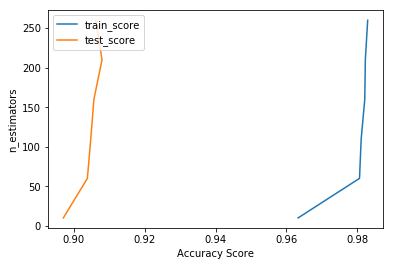

In [77]:
plt.plot(bgcl_data['train_score'],bgcl_data['n_estimators'])
plt.plot(bgcl_data['test_score'],bgcl_data['n_estimators'])
plt.xlabel('Accuracy Score')
plt.ylabel('n_estimators')
plt.legend(['train_score', 'test_score'], loc='upper left')

Bagging classifier increased the overall accuracy of the model

**3. Random Forest Classifier**

In [78]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 6)
rfcl = rfcl.fit(X_train, y_train)

In [79]:
rfcl.score(X_test,y_test)

rfcl_pred = rfcl.predict(X_test)

train_score = rfcl.score(X_train, y_train)
test_score = rfcl.score(X_test, y_test)
precision = precision_score(y_test, rfcl_pred)
recall = recall_score(y_test, rfcl_pred)
f1 = f1_score(y_test, rfcl_pred)

In [80]:
train_score

0.9852434669952919

In [81]:
test_score

0.8964169861397818

In [82]:
rf_conf_mat = confusion_matrix(y_test, rfcl_pred)
rf_conf_mat

array([[11617,   360],
       [ 1045,   542]], dtype=int64)

In [83]:
model_evaluation(RandomForestClassifier, criterion='entropy', max_depth=15, min_samples_leaf=15)

C:\Users\punit\Anaconda3\envs\aiml\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


(sklearn.ensemble.forest.RandomForestClassifier,
 'entropy',
 15,
 15,
 0.9162953834486681,
 0.9030521969920378,
 0.6704260651629073,
 0.3371140516698173,
 0.4486373165618449,
 array([[11714,   263],
        [ 1052,   535]], dtype=int64))

In [84]:
d_forest=[]
for depth in np.arange(1,50,2):
    model, criterion, max_depth, min_samples_leaf, train_score, test_score, precision, recall, f1, confusion_mat = model_evaluation(DecisionTreeClassifier, criterion='entropy', max_depth=depth, min_samples_leaf=15)
    d_forest_mod = {'model':model, 'max_depth': max_depth, 'train_score':train_score, 'test_score': test_score, 'precision':precision, 'recall':recall, 'f1':f1 }
    d_forest.append(d_forest_mod)
dforest_data = pd.DataFrame(d_forest)

C:\Users\punit\Anaconda3\envs\aiml\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\punit\Anaconda3\envs\aiml\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [85]:
dforest_data.head()

f1  max_depth                                              model  \
0  0.000000          1  <class 'sklearn.tree.tree.DecisionTreeClassifi...   
1  0.266473          3  <class 'sklearn.tree.tree.DecisionTreeClassifi...   
2  0.346374          5  <class 'sklearn.tree.tree.DecisionTreeClassifi...   
3  0.497611          7  <class 'sklearn.tree.tree.DecisionTreeClassifi...   
4  0.536875          9  <class 'sklearn.tree.tree.DecisionTreeClassifi...   

   precision    recall  test_score  train_score  
0   0.000000  0.000000    0.882999     0.883022  
1   0.576520  0.173283    0.888381     0.889784  
2   0.572674  0.248267    0.890372     0.894145  
3   0.597002  0.426591    0.899219     0.906405  
4   0.602826  0.483932    0.902315     0.913610

In [86]:
dforest_data.iloc[dforest_data['train_score'].idxmax()]

f1                                                      0.510579
max_depth                                                     19
model          <class 'sklearn.tree.tree.DecisionTreeClassifi...
precision                                               0.567901
recall                                                  0.463768
test_score                                              0.895975
train_score                                             0.925175
Name: 9, dtype: object

In [87]:
dforest_data.iloc[dforest_data['test_score'].idxmax()]

f1                                                      0.536875
max_depth                                                      9
model          <class 'sklearn.tree.tree.DecisionTreeClassifi...
precision                                               0.602826
recall                                                  0.483932
test_score                                              0.902315
train_score                                              0.91361
Name: 4, dtype: object

In [88]:
dforest_data.iloc[dforest_data['precision'].idxmax()]

f1                                                      0.536875
max_depth                                                      9
model          <class 'sklearn.tree.tree.DecisionTreeClassifi...
precision                                               0.602826
recall                                                  0.483932
test_score                                              0.902315
train_score                                              0.91361
Name: 4, dtype: object

In [89]:
dforest_data.iloc[dforest_data['recall'].idxmax()]

f1                                                      0.536875
max_depth                                                      9
model          <class 'sklearn.tree.tree.DecisionTreeClassifi...
precision                                               0.602826
recall                                                  0.483932
test_score                                              0.902315
train_score                                              0.91361
Name: 4, dtype: object

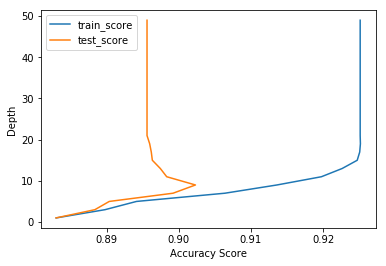

In [90]:
plt.plot(dforest_data['train_score'],dforest_data['max_depth'])
plt.plot(dforest_data['test_score'],dforest_data['max_depth'])
plt.xlabel('Accuracy Score')
plt.ylabel('Depth')
plt.legend(['train_score', 'test_score'], loc='upper left')

From the above, we could see by increasing the depth of random forest classifier, accuracy also increases.

Based on Accuracy, Preceision, recall I would chose mas depth value to be 9, which is having accuracy score of 0.902315

**3. AdaBoosting**

In [91]:
abcl = AdaBoostClassifier(base_estimator=dt_model, n_estimators=50)
abcl = abcl.fit(X_train, y_train)

In [92]:
abcl_pred = abcl.predict(X_test)

In [93]:
abcl.score(X_train,y_train)

1.0

In [94]:
abcl.score(X_test, y_test)

0.8757003833677381

In [95]:
precision_score(y_test, abcl_pred)

0.46994535519125685

In [96]:
recall_score(y_test, abcl_pred)

0.4877126654064272

In [97]:
f1_score(y_test, abcl_pred)

0.47866419294990725

In [98]:
abcl_conf_mat = confusion_matrix(y_test, abcl_pred)
abcl_conf_mat

array([[11104,   873],
       [  813,   774]], dtype=int64)

**Adaboost clearly is overfitted model. We need to tune it to reduce overfitting**

**4. GradientBoost**

In [99]:
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.09, max_depth=5)
gbcl = gbcl.fit(X_train, y_train)

In [100]:
gbcl_pred = gbcl.predict(X_test)

In [101]:
gbcl.score(X_train,y_train)

0.9170221505987929

In [102]:
gbcl.score(X_test, y_test)

0.9034945443821881

In [103]:
precision_score(y_test, gbcl_pred)

0.6424180327868853

In [104]:
recall_score(y_test, gbcl_pred)

0.3950850661625709

In [105]:
f1_score(y_test, gbcl_pred)

0.48927038626609437

In [106]:
gbcl_conf_mat = confusion_matrix(y_test, gbcl_pred)
gbcl_conf_mat

array([[11628,   349],
       [  960,   627]], dtype=int64)

In [108]:
confusion_mat_dtree

array([[11129,   848],
       [  827,   760]], dtype=int64)

In [109]:
rf_conf_mat

array([[11617,   360],
       [ 1045,   542]], dtype=int64)

In [110]:
abcl_conf_mat

array([[11104,   873],
       [  813,   774]], dtype=int64)

**Confusion Matrix Analysis on all models**

Gradient Boosted correctly classified about the customers who as not subscribed to Term Deposit (True Positive)

Where as Decision tree correctly classified about the customers who has subsribed to Term Deposit (False Positive)

But most of the missclassification ( False negative and True Negatives ) happened on Decision Tree and Adaboost Classifier.

Gradient Boosted and Random forest missclassified the customers who subscribed term deposits but classified as not subscribed to ter deposit.

So, I would chose either Gradient boosted or Random forest model.
I will try to tune Gradient boosted Model as it is giving much better result than Random Forest Model.

**Gradient Boosting Classifier is giving quite descent result**

**5. Grid Search to tune the model**

In [111]:
from sklearn.model_selection import GridSearchCV

In [112]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [6,7,8,9,10,11,12],
    'criterion' :['gini', 'entropy']
}

In [113]:
CV_rfc = GridSearchCV(estimator=rfcl, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=6, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [200, 500], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [6, 7, 8, 9, 10, 11, 12], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [114]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 11,
 'max_features': 'auto',
 'n_estimators': 500}

In [115]:
rfc1=RandomForestClassifier(random_state=101, max_features='auto', n_estimators= 500, max_depth=12, criterion='gini')

In [116]:
rfc1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=12, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=101, verbose=0, warm_start=False)

In [117]:
pred=rfc1.predict(X_test)

In [118]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))

Accuracy for Random Forest on CV data:  0.9048215865526393


In [119]:
print("Precision for Random Forest on CV data: ",precision_score(y_test,pred))

Precision for Random Forest on CV data:  0.6651785714285714


In [120]:
print("Recall for Random Forest on CV data: ",recall_score(y_test,pred))

Recall for Random Forest on CV data:  0.3755513547574039


In [121]:
print("F1 Score for Random Forest on CV data: ",f1_score(y_test,pred))

F1 Score for Random Forest on CV data:  0.48006443817962147


**3. Feature Importance**

In [122]:
rfcl.feature_importances_

array([0.10547848, 0.0490834 , 0.02266717, 0.02824792, 0.00193767,
       0.10658555, 0.01902122, 0.01051155, 0.01959384, 0.08881727,
       0.09086772, 0.29608186, 0.03929258, 0.05295178, 0.01806991,
       0.05079208])

In [123]:
feature_importances = pd.DataFrame(rfcl.feature_importances_,index = X_train.columns,columns=['importance']).sort_values('importance',ascending=False)
feature_importances

importance
duration     0.296082
balance      0.106586
age          0.105478
month        0.090868
day          0.088817
pdays        0.052952
poutcome     0.050792
job          0.049083
campaign     0.039293
education    0.028248
marital      0.022667
contact      0.019594
housing      0.019021
previous     0.018070
loan         0.010512
default      0.001938

# Combining Model Tuning and feature importance

Now let's go to final phase to perform GridSearch on GradientBoosted Classifier and Random Forest Classifier with important feature.

As mentioned in the beginning, let's remove duration feature even though it is very important feature

### GradientBossted Classifier with GridSearch and Important Feature

In [124]:
predictors = ['balance','age','day','month']
param = {'n_estimators':range(20,81,10),'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200), 'min_samples_leaf':range(30,71,10)}
gsearch = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1,max_features='sqrt',subsample=0.8,random_state=101),
                        param_grid = param, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch.fit(X_train[predictors],y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sam...      subsample=0.8, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'n_estimators': range(20, 81, 10), 'max_depth': range(5, 16, 2), 'min_samples_split': range(200, 1001, 200), 'min_samples_leaf': range(30, 71, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [125]:
gsearch.best_params_, gsearch.best_score_

({'max_depth': 15,
  'min_samples_leaf': 40,
  'min_samples_split': 1000,
  'n_estimators': 50},
 0.7481092661764752)

In [126]:
grad_grid_clf = GradientBoostingClassifier(learning_rate=0.1,max_features='sqrt',subsample=0.8,
                                           random_state=101,max_depth= 15, min_samples_leaf=40,
                                           min_samples_split=1000, n_estimators= 50)
grad_grid_clf.fit(X_train[predictors],y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=15,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=40, min_samples_split=1000,
              min_weight_fraction_leaf=0.0, n_estimators=50,
              n_iter_no_change=None, presort='auto', random_state=101,
              subsample=0.8, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [127]:
gb_pred=rfc1.predict(X_test)


In [128]:
print("Accuracy for Gradient Boosted Classifier on CV data: ",accuracy_score(y_test,gb_pred))

print("Precision for Gradient Boosted Classifier on CV data: ",precision_score(y_test,gb_pred))

print("Recall for Gradient Boosted Classifier on CV data: ",recall_score(y_test,gb_pred))

print("F1 Score for Gradient Boosted Classifier on CV data: ",f1_score(y_test,gb_pred))

confusion_matrix(y_test,gb_pred)

Accuracy for Gradient Boosted Classifier on CV data:  0.9048215865526393
Precision for Gradient Boosted Classifier on CV data:  0.6651785714285714
Recall for Gradient Boosted Classifier on CV data:  0.3755513547574039
F1 Score for Gradient Boosted Classifier on CV data:  0.48006443817962147


array([[11677,   300],
       [  991,   596]], dtype=int64)

### RandomForest Classifier with Important Features

In [143]:
rfc2=RandomForestClassifier(random_state=101, max_features='auto', n_estimators= 500, max_depth=12, criterion='gini')

In [144]:
rfc2.fit(X_train[predictors], y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=12, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=101, verbose=0, warm_start=False)

In [151]:
rfc2_pred=rfc2.predict(X_test[predictors])

In [152]:
print("Accuracy for Random Forest with Important Features: ",accuracy_score(y_test,rfc2_pred))

Accuracy for Random Forest with Important Features:  0.8836626363904453


In [153]:
print("Precision for Random Forest with Important Features: ",precision_score(y_test,rfc2_pred))

Precision for Random Forest with Important Features:  0.5147540983606558


In [154]:
print("Recall for Random Forest with Important Features: ",recall_score(y_test,rfc2_pred))

Recall for Random Forest with Important Features:  0.09892879647132956


In [155]:
print("F1 Score for Random Forest with Important Features: ",f1_score(y_test,rfc2_pred))

F1 Score for Random Forest with Important Features:  0.1659619450317125


**Based on the accuracy, precision and recall, I would chose Gradient Boosted Classifier because Random forest poorly performed in terms of recall**

In [156]:
confusion = confusion_matrix(y_test,gb_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

# Range estimate at 95% confidence for the model performance in production.

In [157]:
#classification_error is 1-accuracy or the method mentioned below
classification_error = (FP + FN) / float(TP + TN + FP + FN) 

the confidence interval for classification error can be calculated as follows:

**error +/- z * sqrt( (error * (1 - error)) / n**

Where error is the classification error, 
const is a constant value that defines the chosen probability, 
sqrt is the square root function, 
and n is the number of observations (rows) used to evaluate the model. 

Technically, this is called the Wilson score interval.

The values for const are provided from statistics, and common values used are:

1.64 (90%)
1.96 (95%)
2.33 (98%)
2.58 (99%)

**Here our goal is range estimate at 95% confidennce, so cont value is 1.96**

We can calculate the 95% confidence interval (z = 1.96) as follows:

**Confidence Interval based on Classification Error**

In [159]:
z = 1.96

In [160]:
lower_bound = max(0,classification_error- (z*np.sqrt(classification_error*(1-classification_error))))

In [161]:
upper_bound = classification_error+ (z*np.sqrt(classification_error*(1-classification_error)))

In [162]:
confidence_interval = [lower_bound,upper_bound]

In [163]:
confidence_interval

[0, 0.6703623893430324]

There is a 95% likelihood that the confidence interval [0.0, 0.67036] covers 
the true classification error of the model on unseen data.